In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import collections

social_tweets = pd.read_csv (r"C:\Users\akasn\Desktop\Bothunting\datasets_full.csv\social_spambots_1.csv\tweets.csv" ) 

traditional_tweets = pd.read_csv (r"C:\Users\akasn\Desktop\Bothunting\datasets_full.csv\traditional_spambots_1.csv\tweets.csv")

genuine_tweets = pd.read_csv (r"C:\Users\akasn\Desktop\Bothunting\datasets_full.csv\genuine_accounts.csv\tweets.csv") 

In [39]:
#creates dataframe consisting only of ["created_at","user_id" and "id" columns for a select user] with "created_at" as the index

def select_user(user_id):

    social_tweets_2 = social_tweets.set_index("created_at", drop=False)
    social_tweets_3 = social_tweets_2[[ "id", "user_id", "created_at"]]
    is_social_user = social_tweets_3["user_id"]==user_id
    social_tweets_4 = social_tweets_3[is_social_user]
    return(social_tweets_4)




In [42]:
print(select_user(24858289))

id   user_id  \
created_at                                                     
Wed Nov 12 20:14:48 +0000 2014  532627591686275072  24858289   
Wed Nov 12 20:01:32 +0000 2014  532624255058706432  24858289   
Wed Nov 12 12:41:32 +0000 2014  532513524460052480  24858289   
Tue Nov 11 22:23:43 +0000 2014  532297646669852672  24858289   
Tue Nov 11 22:17:01 +0000 2014  532295960807100416  24858289   
...                                            ...       ...   
Wed May 04 20:43:48 +0000 2011   65879319498588160  24858289   
Sun Jan 09 20:16:48 +0000 2011   24197918651064322  24858289   
Sun Jan 09 20:11:02 +0000 2011   24196468076183552  24858289   
Sun Jan 09 20:06:57 +0000 2011   24195441352507392  24858289   
Tue Mar 17 08:57:10 +0000 2009          1341215499  24858289   

                                                    created_at  
created_at                                                      
Wed Nov 12 20:14:48 +0000 2014  Wed Nov 12 20:14:48 +0000 2014  
Wed Nov 12 20:01:32 

In [63]:
sample = select_user(24858289)

sample["created_at"] = sample["created_at"].map(lambda x: x.lstrip("Mon Tue Wed Thu Fri Sat Sun Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec"))

sample_2 = sample.set_index("created_at", drop=False)

print(sample_2)

id   user_id              created_at
created_at                                                                  
12 20:14:48 +0000 2014  532627591686275072  24858289  12 20:14:48 +0000 2014
12 20:01:32 +0000 2014  532624255058706432  24858289  12 20:01:32 +0000 2014
12 12:41:32 +0000 2014  532513524460052480  24858289  12 12:41:32 +0000 2014
11 22:23:43 +0000 2014  532297646669852672  24858289  11 22:23:43 +0000 2014
11 22:17:01 +0000 2014  532295960807100416  24858289  11 22:17:01 +0000 2014
...                                    ...       ...                     ...
4 20:43:48 +0000 2011    65879319498588160  24858289   4 20:43:48 +0000 2011
9 20:16:48 +0000 2011    24197918651064322  24858289   9 20:16:48 +0000 2011
9 20:11:02 +0000 2011    24196468076183552  24858289   9 20:11:02 +0000 2011
9 20:06:57 +0000 2011    24195441352507392  24858289   9 20:06:57 +0000 2011
17 08:57:10 +0000 2009          1341215499  24858289  17 08:57:10 +0000 2009

[2518 rows x 3 columns]


In [47]:
print(social_tweets.head())

id                                               text  \
0  532627591686275072   I Pooh - In silenzio 1968 http://t.co/ahvQxUqTws   
1  532624255058706432                             http://t.co/HyI5EQKz6Q   
2  532513524460052480  Tutti a tavola, con il filetto di baccalà. htt...   
3  532297646669852672                             http://t.co/NAHQ4l2pUy   
4  532295960807100416       Gold - Spandau Ballet http://t.co/o8ZJHt7Neu   

                                              source   user_id  truncated  \
0  <a href="http://www.facebook.com/twitter" rel=...  24858289        NaN   
1  <a href="http://www.facebook.com/twitter" rel=...  24858289        NaN   
2  <a href="http://www.facebook.com/twitter" rel=...  24858289        NaN   
3  <a href="http://www.facebook.com/twitter" rel=...  24858289        NaN   
4  <a href="http://www.facebook.com/twitter" rel=...  24858289        NaN   

   in_reply_to_status_id  in_reply_to_user_id in_reply_to_screen_name  \
0                      0  

In [48]:
print(social_tweets.shape)

(1610034, 25)


In [49]:
social_tweets.info()
#90 tweets don't contain a text value (API error possible)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610034 entries, 0 to 1610033
Data columns (total 25 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1610034 non-null  int64  
 1   text                     1609944 non-null  object 
 2   source                   1610034 non-null  object 
 3   user_id                  1610034 non-null  int64  
 4   truncated                0 non-null        float64
 5   in_reply_to_status_id    1610034 non-null  int64  
 6   in_reply_to_user_id      1610034 non-null  int64  
 7   in_reply_to_screen_name  11593 non-null    object 
 8   retweeted_status_id      1610034 non-null  int64  
 9   geo                      0 non-null        float64
 10  place                    2912 non-null     object 
 11  contributors             0 non-null        float64
 12  retweet_count            1610034 non-null  int64  
 13  reply_count              1610034 non-null 

In [50]:
#None of the bots seem to use geolocation
test_social_tweets = social_tweets.place.dropna()

print(test_social_tweets.head(10))
print(test_social_tweets.shape)
#Their seem to be places connected to 2912 of the tweets, which is weird since none of them are supposed to have gelocation enabled

886             Chioggia, Venezia
1856    Campo San Martino, Padova
1857    Campo San Martino, Padova
1858    Campo San Martino, Padova
2133     Maserà di Padova, Padova
2158     Noventa Padovana, Padova
2239    Campo San Martino, Padova
2288                       Padova
2372              Venezia, Veneto
2459     Maserà di Padova, Padova
Name: place, dtype: object
(2912,)


In [51]:
print(social_tweets.text.str.count("http").sum())
print(str((((social_tweets.text.str.count("http").sum())/1610034)*100))+"%")
#Roughly 7.1% of the social bots seem to use links in their tweets

114564.0
7.11562612963453%


In [52]:
traditional_tweets.info()
#In this case place matches geo 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145094 entries, 0 to 145093
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       145094 non-null  int64  
 1   text                     145094 non-null  object 
 2   source                   145094 non-null  object 
 3   user_id                  145094 non-null  int64  
 4   truncated                753 non-null     float64
 5   in_reply_to_status_id    145094 non-null  int64  
 6   in_reply_to_user_id      145094 non-null  int64  
 7   in_reply_to_screen_name  11286 non-null   object 
 8   retweeted_status_id      145094 non-null  int64  
 9   geo                      0 non-null       float64
 10  place                    0 non-null       float64
 11  contributors             0 non-null       float64
 12  retweet_count            145094 non-null  int64  
 13  reply_count              145094 non-null  int64  
 14  favo

In [53]:
print(traditional_tweets.text.str.count("http").sum())
print(str((((traditional_tweets.text.str.count("http").sum())/145094)*100))+"%")
#Roughly 62% of the traditional bots posted links

89444
61.6455539167712%


In [54]:
genuine_tweets.info()
#Why doesn't this present numbers?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2839362 entries, 0 to 2839361
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   id                       object 
 1   text                     object 
 2   source                   object 
 3   user_id                  float64
 4   truncated                float64
 5   in_reply_to_status_id    float64
 6   in_reply_to_user_id      float64
 7   in_reply_to_screen_name  object 
 8   retweeted_status_id      float64
 9   geo                      float64
 10  place                    object 
 11  contributors             float64
 12  retweet_count            float64
 13  reply_count              float64
 14  favorite_count           float64
 15  favorited                float64
 16  retweeted                float64
 17  possibly_sensitive       float64
 18  num_hashtags             float64
 19  num_urls                 float64
 20  num_mentions             float64
 21  created_

In [55]:
print(genuine_tweets.head(10))

id                                               text  \
0  593932392663912449  RT @morningJewshow: Speaking about Jews and co...   
1  593895316719423488  This age/face recognition thing..no reason pla...   
2  593880638069018624  Only upside of the moment I can think of is th...   
3  593847955536252928  If you're going to think about+create experien...   
4  593847687847350272  Watching a thread on FB about possible future ...   
5  593819412660101121                 Don't. Ok? https://t.co/uTXrJ6zvdN   
6  593814612820119552  RT @SanFranciscoBA: #enoughsenough "Surprise! ...   
7  593750651449905152  RT @thepatrickwalsh: Kriss Kross once rapped "...   
8  593750427792867329  RT @TheAtlanticPOL: Watch Baltimore native @ta...   
9  593742580774371329  @thelancearthur @hotdogsladies I didn't realiz...   

                                              source   user_id  truncated  \
0  <a href="http://tapbots.com/tweetbot" rel="nof...  678033.0        NaN   
1  <a href="http://twitter.c

In [56]:
print(genuine_tweets.text.str.count("http").sum())
print(str((((genuine_tweets.text.str.count("http").sum())/2839361)*100))+"%")
#About 27% of actual users are posting links

757878.0
26.691850736838322%


In [57]:
geo_genuine_tweets = genuine_tweets.geo.dropna()
print(geo_genuine_tweets.sum())
#none of the genuine accounts used geolocation either (seems weird)

0.0


In [58]:
print("Hashtags Social: "+str(social_tweets.num_hashtags.sum()))
print("Hashtags Traditional: "+str(traditional_tweets.num_hashtags.sum()))
print("Hashtags Genuine: "+str(genuine_tweets.num_hashtags.sum()))

#Use of Hashtags might be an indicator to detect a genuine account

Hashtags Social: 153530
Hashtags Traditional: 20351
Hashtags Genuine: 703290.0


0.029584110796721234%
0.048244586268212326%
6.211048959214525e-05%


<function matplotlib.pyplot.show(*args, **kw)>

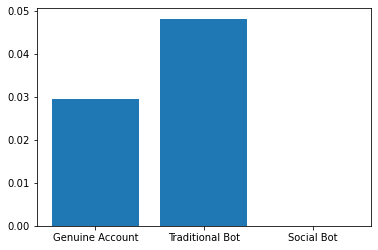

In [59]:
suchwort = " University "

word_count_genuine = (genuine_tweets.text.str.count(suchwort).sum()/2839362)*100
print(str(word_count_genuine)+"%")
word_count_traditional = (traditional_tweets.text.str.count(suchwort).sum()/145094)*100
print(str(word_count_traditional)+"%")
word_count_social = (social_tweets.text.str.count(suchwort).sum()/1610034)*100
print(str(word_count_social)+"%")

Numbers = pd.Series([word_count_genuine, word_count_traditional, word_count_social])
Names = ["Genuine Account", "Traditional Bot", "Social Bot"]

plt.bar(Names, Numbers)

plt.show


In [60]:
from collections import Counter

# split() returns list of all the words in the string 
split_it = str(traditional_tweets.text).split() 

# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(6) 
  
print(most_occur) 

[('Recruitment', 5), ('2010', 4), ('at', 3), ('3', 2), ('em', 2), ('0', 1)]


In [77]:
#install.packages("rtweet")
#library(rtweet)
#import os
#import tweepy as tw
#import pandas as pd
import tweepy


In [79]:
import os
import tweepy as tw
import pandas as pd
import csv
from requests_oauthlib import OAuth1Session


In [81]:
consumer_key= '2dqM1oxHL6ybNsSfMgdwGf2iO'
consumer_secret= 'sYKbwIC24d9RKtZW5CXaxK8t8Q5fMvG1hkkYtV4At9egh9Fdd4'
access_token= '1898213802-g9kTPGb720zaVjHeA73APcn8NwsDrPjCnh9qbf6'
access_token_secret= '8lu2Rmhzmve4GtzVvWNXVM2nZCrzA1g3BTpsIj8HvTUOf'

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)


In [136]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")


In [137]:
#search term ignoring retweets of the same base tweet
search_words = "black" + " -filter:retweets"
date_since = "2020-06-21"

In [138]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(25)


all_tweets = [tweet.text for tweet in tweets]

all_tweets[:20]



['@dfbarron @rolandsmartin And this is why no black person should play. Not only because of health reasons but the ec… https://t.co/ACY9a9ALDa',
 'i really wish this hair color to have a comeback but i love his black hair too!! @BTS_twt https://t.co/MnsApPnDMd',
 'Black father and son tackled by police and threatened with Tasers during charity bike ride https://t.co/hCHNyCXBgY',
 'Feeling Motivated: @xatacysm is goals. This man is the first CEO / Art Director a Black owned Anime studio in Japan… https://t.co/nekeMV0P8k',
 '@DaveSmith3284 I’m genuinely sorry to hear that buddy. I hope you gave the black dog a good kicking and came out th… https://t.co/8r78RvLyEi',
 '@georgie010301 @Black_Zeus31 honestly tell me what I did wrong?',
 '@iraqschristians Defund the black lives movement... Domestic terrorist',
 "@WrestlingGary If that's not the pot calling the kettle black",
 "@Blackshadie Lol...so he's neither white nor black?",
 '@gabbywitha_yuh Also, 89 cops lost their lives. Far more than

In [141]:

# Iterate and print tweets
for tweet in tweets:
    print(tweet.text)

In [142]:
users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs

[]

In [143]:
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "location"])
print(tweet_text)


Empty DataFrame
Columns: [user, location]
Index: []


In [144]:
def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method
    
    #authorize twitter, initialize tweepy
    auth = tw.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tw.API(auth, wait_on_rate_limit=True)
    
    #initialize a list to hold all the tweepy Tweets
    alltweets = []  
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print(f"getting tweets before {oldest}")
        
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        
        print(f"...{len(alltweets)} tweets downloaded so far")
    
    #transform the tweepy tweets into a 2D array that will populate the csv 
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text] for tweet in alltweets]
    
    #write the csv  
    with open(f'new_{screen_name}_tweets.csv', 'w', encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["id","created_at","text"])
        writer.writerows(outtweets)
    
    pass


if __name__ == '__main__':
	#pass in the username of the account you want to download
	get_all_tweets("tim_cook")

getting tweets before 1165980349093957637
...400 tweets downloaded so far
getting tweets before 1056518614927454207
...600 tweets downloaded so far
getting tweets before 915921335993344000
...800 tweets downloaded so far
getting tweets before 733184530622865407
...1000 tweets downloaded so far
getting tweets before 436916954968764418
...1041 tweets downloaded so far
getting tweets before 381131235247923200
...1041 tweets downloaded so far


In [145]:
tim_tweets = pd.read_csv (r"C:\Users\akasn\Desktop\Bothunting\new_tim_cook_tweets.csv")

In [146]:
print(tim_tweets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1041 non-null   int64 
 1   created_at  1041 non-null   object
 2   text        1041 non-null   object
dtypes: int64(1), object(2)
memory usage: 24.5+ KB
None


In [147]:
#Creates a list of the last 2000 tweets by NatGeo 

natgeo_cursor = tweepy.Cursor(api.user_timeline, screen_name = 'NatGeo')
natgeo_tweets = [(tweet.text, tweet.retweet_count, tweet.favorite_count) \
                 for tweet in natgeo_cursor.items(2000)]

In [ ]:
print(natgeo_tweets[2])